<a href="https://colab.research.google.com/github/tasanyphy01773/Computational_Physics/blob/main/Decay_equation_comparison_in_Taylor_and_Eular_Method.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Computational Physics-II\
PHY-459** \

Tahmidul Azom Sany \
Reg: 2017132055 \
Department of Physics, SUST 


In [ ]:
#Theory 

---
**Given Equation:**\
$\frac{dx}{dt} = -ax  $ - - - - -(1)

**Additional information:**\
$a=1$ and $x(0)=100$ \

**We can write eqn(1) as:**\
    $x' =-ax$\
or, $x' = -x$

**From Taylor series, we get,**\
$x(t) = 100-100t+ 100 \frac{t^2}{2!} - 100 \frac{t^3}{3!}.... $

**Value of $(n+1)$th term in the above series is = $(-1)^n×100×\frac{t^n}{n!}$**

In [ ]:
import math 
import scipy
import numpy as np 
import matplotlib.pyplot as plt 

In [ ]:
#Taylor
initial_value = 100
total = 0
term = 5 #number of term  
# n = term-1
print("---------------------------------------------------------")
t = float(input("Input the value of time: ", )) #value that be calculated 
for i in range(term):
  sum = ((-1)**i *initial_value* t**i)/math.factorial(i)
  total = total + sum

#checking value for analytical function 
analytic_total = initial_value * np.exp(-t)

print("---------------------------------------------------------")
print("Taylor Method: Sum for "+ str(t) +" is: ", total)
print("---------------------------------------------------------")
print("Analytical Method: Sum for "+ str(t) +" is: ", analytic_total)


---------------------------------------------------------
Input the value of time: 0.2
---------------------------------------------------------
Taylor Method: Sum for 0.2 is:  81.87333333333332
---------------------------------------------------------
Eular Method: Sum for 0.2 is:  90.0
---------------------------------------------------------
Analytical Method: Sum for 0.2 is:  81.87307530779819


In [ ]:
t = np.arange(0, 2, 0.1)
#Analytical 
analytical_sum = 100*np.exp(-t)

#Taylor method 
taylor_sum = []
for i in range(len(t)):
  taylor_total = 0
  for n in range(5): #upto 3 term 
    sum = (((-1)**n *initial_value* t[i]**n)/math.factorial(n))
    taylor_total = sum +taylor_total
  taylor_sum.append(taylor_total)

In [ ]:
#Eular Method
order = len(t)
h = 0.1
eular_sum = []
eular_sum = np.zeros(order) 

eular_sum[0] = 100 
for i in range(order-1):
  eular_sum[i+1] = eular_sum[i] + h*(-eular_sum[i])

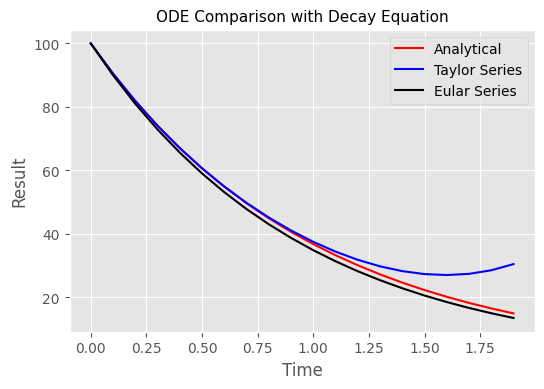

In [ ]:
with plt.style.context('ggplot'):
  plt.figure(dpi=100)
  plt.plot(t, analytical_sum, 'r', label='Analytical')
  plt.plot(t, taylor_sum, 'b', label='Taylor Series')
  plt.plot(t, eular_sum, 'k', label='Eular Series')
  plt.xlabel('Time')
  plt.ylabel('Result')
  plt.title("ODE Comparison with Decay Equation", fontsize= '11')
  plt.grid('on')
  plt.legend()

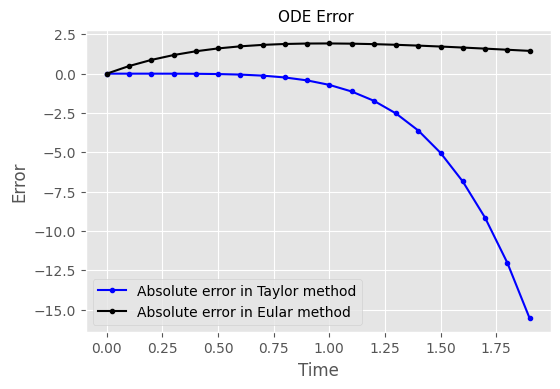

In [ ]:
with plt.style.context('ggplot'):
  plt.figure(dpi=100)
  taylor_diff = analytical_sum - taylor_sum
  eular_diff = analytical_sum - eular_sum

  plt.plot(t, taylor_diff, 'b.-', label="Absolute error in Taylor method")
  plt.plot(t, eular_diff, 'k.-', label="Absolute error in Eular method")
  plt.xlabel("Time")
  plt.ylabel("Error")
  plt.legend()
  plt.title("ODE Error ", fontsize= '11')
  plt.grid('on')
  plt.legend()
